## 2.1 분류(Clsassification)와 회귀(Regression)
1. 분류
a. 분류는 미리 정의된 가능성 있는 여러 클래스 레이블 중 하나를 예측
b. 두 개의 클래스로 분류하는 건 이진 분류(binary classification), 셋 이상의 클래스로 분류하는 건 다중 분류(multiclass classification) 이라 함
2. 회귀
a. 연속적인 숫자(실수)를 예측
b. 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측 또는 특정 농산물의 올 해 수확량 예측
c. 분류문제와 달리 회귀문제에서는 출력값의 작은 차이는 문제가 되지 않음


## 2.2 일반화, 과대적합, 과소적합
- 지도학습에서 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 수 있음
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있다면 이를 훈련 세트에서 테스트 세트로 일반화(generalization)되었다고 함
- 보유하고 있는 모든 정보를 이용해 만든 복잡한 모델은 훈련 세트에만 최적화되어 새로운 데이터에 일반화 되기 어렵다. 이를 과대적합(overfitting)이라 함
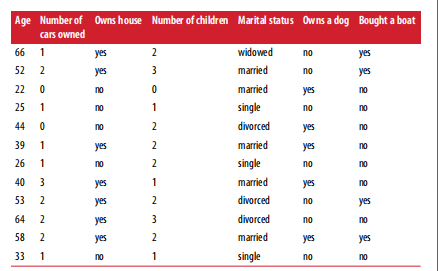
(45세 이상이고, 자녀가 셋 미만이며 이혼하지 않은 고객은 요트를 살 것이다.)
- 모델이 너무 간단하면 데이터의 다양성을 잡아내지 못하고 정확도도 떨어짐, 이를 과소적합(underfitting)이라 함 (집이 있는 사람은 모두 요트를 사려고 함)
- 모델이란, 수학적 알고리즘의 표현식
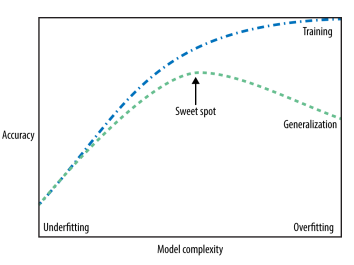
- 다음 그림과 같이 일반화 성능이 최대가 되는 최적점에 있는 모델을 찾아야 함
1. 데이터 세트에 다양한 데이터 포인트가 많을수록(feature의 수가 많을수록) 과대적합 없이 더 복잡한 모델을 구축할 수 있음

## 2.3 지도 학습 알고리즘
1. 예제에 사용할 데이터 셋
a. forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋 feature 2개, target 1
- x축은 첫 번째 특성, y축은 두 번째 특성으로 그래프 작성

In [3]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
print(X)
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


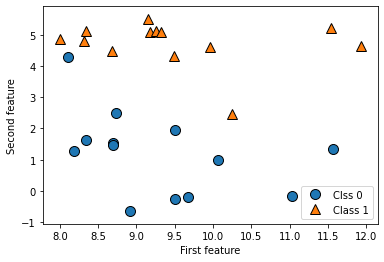

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Clss 0", "Class 1"], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()

In [8]:
print("X.shape :", X.shape)

X.shape : (26, 2)


b. 회귀 알고리즘에는 인위적으로 만든 wave 데이터셋을 사용
- 입력 특성 한 개와 target 변수를 가짐
- 특성을 x축, target을 y축

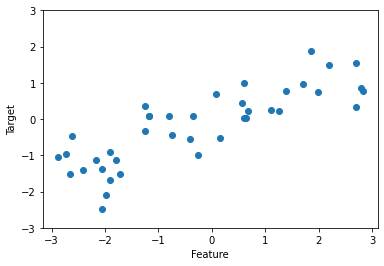

In [9]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

c. scikit-learn 에 들어 있는 실제 데이터셋 사용
- 유방암 종양의 임상 데이터를 기록해 놓은 위스콘신 유방암 데이터 셋(cancer)
- 각 종양은 양성(benign)과 악성(malignant)로 레이블 되어 있음
- 조직 데이터를 기반으로 종양이 악성인지를 예측하도록 학습하는 것이 과제

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
print(cancer.data.shape)

(569, 30)


In [14]:
import numpy as np
print("클래스별 샘플 수:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 수:
{'malignant': 212, 'benign': 357}


In [16]:
print(cancer.target_names)

['malignant' 'benign']


In [18]:
count = [n for n in np.bincount(cancer.target)]
print(count)

[212, 357]


In [21]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [22]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


d. 또 하나의 실제 데이터셋  
- 보스턴 주택가격 데이터 셋  
- 범죄율, 찰스강 인접도, 고속도록 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격을 예측  
- 이 데이터 셋에는 샘플 506개 feature 13개

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


C:\Users\BIT\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing


- 이 데이터 셋에는 13개의 입력 feature뿐 아니라 feature끼리 곱하여 의도적으로 확장  
- 이러한 방법을 특성공학(feature engineering) 이라 함


In [26]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


C:\Users\BIT\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

- 원래의 feature 13개 에서 2개씩(중복 포함) 짝지은 91개의 feature를 더 해 총 104개

## 2. k-NN
a. k-Nearest Neighbors  
- k-NN은 가장 가까운 훈련 데이터 샘플을 최근접 이웃으로 찾아 예측에 사용  

C:\Users\BIT\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


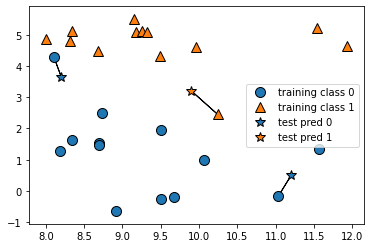

In [28]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\BIT\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


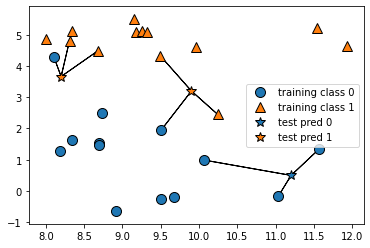

In [29]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [40]:
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_forge()
# forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋 feature 2개, target 1

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

C:\Users\BIT\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [42]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
print(clf.predict(X_test))

[1 0 1 0 1 0 0]


In [44]:
print(clf.score(X_test, y_test))

0.8571428571428571


## KNeighborsClassifier 분석  
- 2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그려봄  
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하여 결정 경계(decision boundary)를 확인함  
- 다음은 이웃이 하나, 셋, 아홉 개일 때의 결정 경계를 보여줌

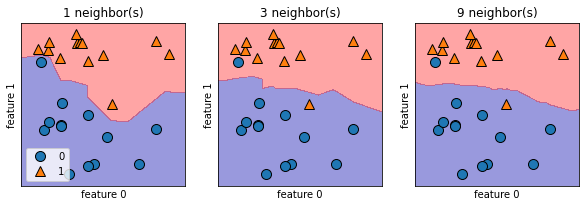

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)
plt.show()

- 이웃을 하나 선택했을 때는 결정 경꼐가 훈련 데이터에 가깝게 따라감
- 이웃의 수를 늘릴 수록 결정 경계는 더 부드러워짐, 부드러운 경계는 더 단순한 모델을 의미
- 이웃을 적게 사용하면 모델의 복잡도가 증가(Overfitting), 많이사용하면 복잡도는 감소(underfitting)
- 훈련데이터 전체 수를 이웃수로 지정하느 극단적인 경우, 모든 테스트 포인트가 같은 이웃을 가지므로 테스트 포인트에 대한 예측은 모든 같은 값이 나옴
- 즉 훈련 세트에서 가장 많은 데이터포인트를 가진 클래스가 예측값이 됨

- 모델의 복잡도와 일반화 사이의 관계를 입증해 봄  
- 실제 데이터인 유방암 데이터셋을 사용  
- 훈련 세트와 테스트 세트로 나눔  
- 이웃의 수를 달리하면서 훈련 세트와 테스트 세트의 성능을 평가함

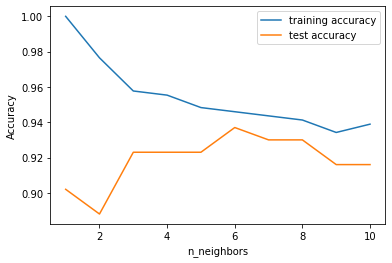

In [46]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
# stratify : 이 옵션을 target으로 지정하면 train, test set으로 분리할 때 각 클래스(양성, 음성) 비율을 유지하게 함

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

- Overfitting과 Underfitting의 특징을 잘 보여줌  
- 최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽  
- 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 감소  
- 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮음  
- 1-NN 이 모델을 너무 복잡하게 만든다는 것을 설명함  
- 10-NN 은 모델이 너무 단순해서 정확도는 떨어짐  
- 정확도가 가장 좋을 때는 중간 정도인 6-NN 임

## k-neighbors regression  
- wave 데이터 셋을 이용해서 회귀분석에 사용  
- x 축에 세 개의 테스트 데이터를 흐린 별 모양으로 표시  
- 최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 target 값임

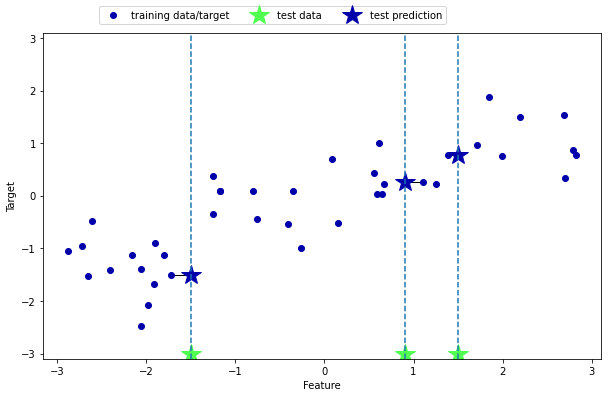

In [47]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

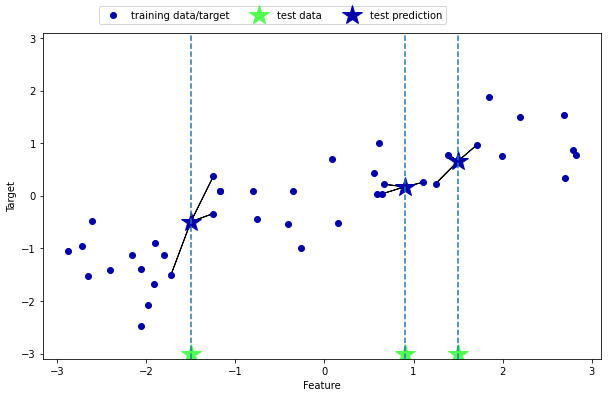

In [48]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [55]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples = 40)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [57]:
print(reg.score(X_test, y_test))

0.8344172446249605


- score 메서드를 사용해 모델을 평가할 수 있음  
- 이 메서드는 회귀일 땐 R<sup>2</sup> 값을 반환 : R<sup>2</sup> = 1 - ( sigma(y-예측값)<sup>2</sup> / sigma(y-평균)<sup>2</sup> )  
- 결정 계수라고도 하는 R<sup>2</sup> 값은 회귀 모델에서 예측의 적합도를 측정한 값, 보통 0과 1사이의 값  
- 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균만으로만 예측하는 모델의 경우  
- R<sup>2</sup> 은 음수가 될 수도 있음, 이 때는 예측과 target이 상반된 경향을 가지는 경우  
- 아래의 경우 0.83이라 모델이 비교적 잘 들어맞은 경우

## KNeighborsRegression 분석  
- 1차원 데이터셋에 대한 가능한 모든 특성 값을 만들어 예측해 볼 수 있음  
- 이를 위해 x 축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만듬

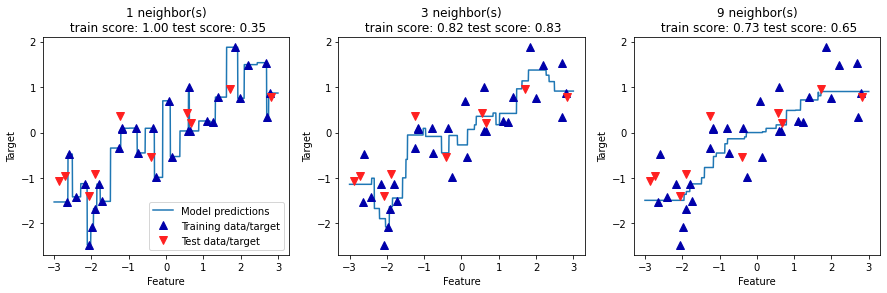

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()

- 이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나감  
- 이는 매우 불안정한 예측을 만들어 냄  
- 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정적인 예측을 얻음

### 장단점과 매개변수  
- 일반적으로 KNeighbors 분류기에 중요한 매개변수는 두 개, 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수  
- 실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 동작하지만, 이 매개변수는 잘 조정해야 함  
- 거리 재는 벙법을 고르는 문제는 또 다른 문제, 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용(mertic 매개변수를 사용하여 거리 측정 방식을 변경할 수 있음)  
- k-NN 의 장점은 이해하기 매우 쉬운 모델, 많은 조정 필요없이 자주 좋은 성능을 발휘  
- 더 복잡한 알고리즘을 적용하기 전에 시도해볼 수 있는 좋은 시작점  
- 훈련 세트가 매우 크면 예측이 느려짐  
- k-NN 알고리즘을 사용할 때는 데이터 전처리가 매우 중요(모든 특성값들이 같은 스케일을 갖도록 정규화하는 것이 일반적)  
- 수백 개 이상의 많은 feature를 가진 데이터셋에는 잘 동작하지 않음  
- feature 값 대부분이 0인 데이터셋과는 특히 잘 동작하지 않음  
- k-NN 알고리즘이 이해하긴 쉽지만, 예측이 느리고 많은 feature를 처리하는 능력이 부족해 현업에서는 잘 쓰지 않음  
- 다음은 이런 단점이 없는 선형 모델 알고리즘